In [1]:
## Import the libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')




### Check for Headers and Footers

In [2]:
# load the Raw data
# Given Data

#set low_memory to False - avoid dtype error
dt = pd.read_csv('Loan.csv', low_memory=False)
#dt= pd.read_csv("loan.csv")

#check for headers 
dt.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
#check for footers
dt.tail()

#The data set has no headers or footers 

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# To get an insight of the RAW data
dt.info()
dt.shape

#There are 39717 rows and 111 columns -(39717, 111)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


(39717, 111)

### Data Preparation

In [5]:
#-Data Cleaning

#To find out the total number of columns whose values are all NaN

null_columns = dt.columns[dt.isnull().all()]
print(len(null_columns))



54


In [6]:
# Out of 111 columns, we have 54 columns whose values are all NaN

# We can remove these 54 columns as these columns can not contribute anything for our analysis


In [7]:
#Removing the columns whose values are all NaN
dt.dropna(axis = 1, how = 'all', inplace = True)

dt.shape



(39717, 57)

In [8]:
# We have successfully dropped 54 null valued columns from the data set

In [9]:
#To get columns which has single/same value throughout
same_valued_columns = dt.columns[dt.nunique() == 1]

# Print the number of single-valued columns
print(len(same_valued_columns))
print(same_valued_columns)



9
Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')


In [10]:
# There are 9 columns which has same value throughout
# As these 9 column value does not change with other variables, it will have no impact in our data analysis
# We can remove these 9 columns from the data set


In [11]:
dt.drop(['pymnt_plan', "initial_list_status",'collections_12_mths_ex_med','policy_code','acc_now_delinq', 'application_type', 'pub_rec_bankruptcies', 'tax_liens', 'delinq_amnt'], axis = 1, inplace = True)
dt.shape

(39717, 48)

In [12]:
#To get columns which has all value unique throughout
Allunique_valued_columns = dt.columns[dt.nunique() == 39717]

# Print the number of single-valued columns
print(len(Allunique_valued_columns))
print(Allunique_valued_columns)

3
Index(['id', 'member_id', 'url'], dtype='object')


In [13]:
# dropping the column 'id', 'member_id',and 'url'

dt.drop(['id', 'member_id', 'url'],axis = 1, inplace = True)



In [14]:
dt.shape


(39717, 45)

In [15]:
# The 45 columns we are left with after cleaning 
dt.columns



Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'chargeoff_within_12_mths'],
      dtype='object')

In [16]:
# We have only 45 columns after doing the basic clean of NaN and constant valued columns

# Dropping off irrelevant column for our analysis from the defintion referring the Dictionary excel file

# Dropping off Customer Behaviours Variables

dt.drop(['funded_amnt','funded_amnt_inv','inq_last_6mths','total_acc','open_acc','revol_util','pub_rec','sub_grade', 'emp_title','desc','title','zip_code','out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'chargeoff_within_12_mths', 'addr_state','revol_bal','delinq_2yrs', 
        'earliest_cr_line','mths_since_last_delinq', 'mths_since_last_record', ],axis = 1, inplace = True)

In [17]:
dt.shape

(39717, 13)

### Relevant Colums for our Analysis

In [18]:
#After dropping the consumer behaviourial variables and irrelevant columns

#Now, we have only 13 columns relevant columns

dt.columns


Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'dti'],
      dtype='object')

In [19]:
#Finding the null values in the current data set

null_percentage = dt.isnull().sum() / len(dt) * 100
print(null_percentage)

loan_amnt              0.00000
term                   0.00000
int_rate               0.00000
installment            0.00000
grade                  0.00000
emp_length             2.70665
home_ownership         0.00000
annual_inc             0.00000
verification_status    0.00000
issue_d                0.00000
loan_status            0.00000
purpose                0.00000
dti                    0.00000
dtype: float64


In [20]:
# We have 2.7% null values in emp_length

# undersatnding the distribution of emp_length

dt.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [21]:
# Mode of emp_length

print("Mode : " + dt.emp_length.mode()[0])

Mode : 10+ years


In [22]:
#The mode 10+years value has far higher frequency than that of the next most frequent value.

#Hence assign the mode values for NaN , as it will be safe

dt.emp_length.fillna(dt.emp_length.mode()[0], inplace = True)
dt.emp_length.isna().sum()

0

In [23]:
# We have succesfully handled the missing value of the data set

In [24]:
#On Observig the data set ,the records where the loan_status ='Current' will not be useful for our analysis

#Now we will restric the data only to loan status=charged off and Loan status=Fully Paid

# We will remove loan_status='Current' variables in the current data set

dt=dt[dt['loan_status']!='Current']
dt.shape

(38577, 13)

In [25]:
# Understanding the data types of current data set
dt.dtypes

loan_amnt                int64
term                    object
int_rate                object
installment            float64
grade                   object
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
issue_d                 object
loan_status             object
purpose                 object
dti                    float64
dtype: object

In [26]:
# Understanding the values of the current data set

#dt['loan_amnt'].value_counts()
#dt['int_rate'].value_counts()
#dt['term'].value_counts()
#dt['installment'].value_counts()
#dt['emp_length'].value_counts()
#dt['home_ownership'].value_counts()
#dt['loan_status'].value_counts()
#dt['annual_inc'].value_counts()
#dt['purpose'].value_counts()
#dt['verification_status'].value_counts()
#dt['issue_d'].value_counts()
#dt['dti'].value_counts()



### Data Standardization

### After observing the current data set ,we found that few variables needed data standardizing to use them in our analysis

### Varaibles need to be standardized are int_rate,issue_d



### Variable term has only two values 30 months and 60 months we will keep them as it is without changing it to numeric

### Similarly we will keep emp_length as a categorical variable , as 10+ years can be any practical number


In [27]:
#Standardizing the interest rate column 
#Strip out '%' and convert the value to float for numerical analysis
dt['int_rate']=dt['int_rate'].str.strip('%').astype(float)
dt['int_rate'].dtype
dt['int_rate'].value_counts()

10.99    913
11.49    790
7.51     787
13.49    749
7.88     725
        ... 
16.96      1
18.36      1
16.15      1
16.01      1
16.20      1
Name: int_rate, Length: 370, dtype: int64

In [28]:

# Removing the phrase years','year'and blank spaces from emp_length for better readability and visualization

def std_emp_length(emp_length):
    
    emp_length=emp_length.replace("years","")
    emp_length=emp_length.replace("year","")
    #emp_length=emp_length.replace("<1","0")
    #emp_length=emp_length.replace("+","")
    emp_length=emp_length.replace(" ","")
    return emp_length
dt['emp_length']=dt['emp_length'].astype(str).apply(lambda x: std_emp_length(x))
dt['emp_length'].value_counts()
    

    

10+    9521
<1     4508
2      4291
3      4012
4      3342
5      3194
1      3169
6      2168
7      1711
8      1435
9      1226
Name: emp_length, dtype: int64

In [29]:

#Standardizing the variable "issue_d" by converting and formatting the object to date 

dt['issue_d'] = pd.to_datetime(dt['issue_d'], format='%b-%y')
dt['issue_d'].dtype

# Deriving two new separate variables for month and year from 'issue_d'

dt['issue_month'] = dt['issue_d'].dt.strftime('%b') # for better representaion of month as Jan,Feb.. instead of 1,2..
dt['issue_year'] = dt['issue_d'].dt.year

In [30]:
dt['issue_month'].value_counts() #understanding the value distribution of issue_month

Dec    4215
Nov    4006
Oct    3761
Sep    3498
Aug    3388
Jul    3351
Jun    3180
May    2919
Apr    2831
Mar    2691
Jan    2379
Feb    2358
Name: issue_month, dtype: int64

In [31]:
dt['issue_year'].value_counts() #understanding the value distribution of issue_year

2011    20516
2010    11532
2009     4716
2008     1562
2007      251
Name: issue_year, dtype: int64

In [32]:
dt['home_ownership'].value_counts() #understanding the value distribution of home_Ownership

RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [33]:
# Imputing the value for home_ownership variable where value is NONE and assume that to OTHER, 

# As we have only 3 data having value 'NONE', it is safe to change to OTHER

# Moreover,the term "OTHER" and "NONE" both has same context in analysis point of view

dt['home_ownership']=dt['home_ownership'].str.replace('NONE','OTHER')
dt['home_ownership'].value_counts()

RENT        18480
MORTGAGE    17021
OWN          2975
OTHER         101
Name: home_ownership, dtype: int64

## Outlier Treatment

0.25     5300.0
0.50     9600.0
0.75    15000.0
0.90    21600.0
0.95    25000.0
0.97    28000.0
0.98    30000.0
0.99    35000.0
Name: loan_amnt, dtype: float64


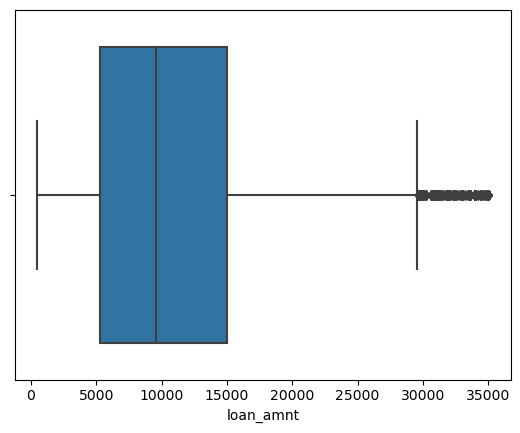

In [34]:
# Now we have cleaned and standardized the data set, we can find the outliers to get the most relevant data for analysis

# Handling Outliers for numeric variables

# Handling Outlier for loan_amnt

print(dt.loan_amnt.quantile([0.25,0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99]))

sns.boxplot(x=dt['loan_amnt'])
plt.show()



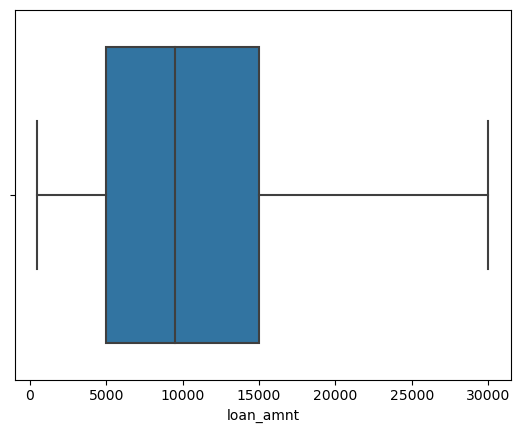

In [35]:
# From the above representation, it is evident that there are outliers for loan_amnt

# From the quantile information ,we can observe the values are continuous until 0.98 and there is sudden spike,

# Hence considering the value only inside the quantile 0.98


loan_amnt_Q98 = dt['loan_amnt'].quantile(0.98)
dt = dt[dt.loan_amnt <= loan_amnt_Q98]

sns.boxplot(x=dt['loan_amnt'])
plt.show()

# The loan_amnt visualization after removing the outliers shown below



0.50    13.3600
0.75    18.5600
0.90    22.2900
0.95    23.8000
0.97    24.5000
0.98    24.8400
0.99    26.5259
Name: dti, dtype: float64


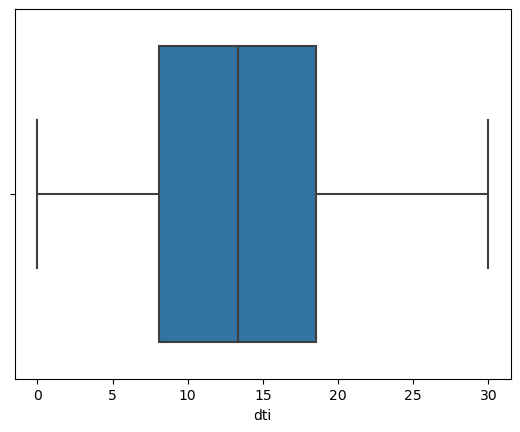

In [36]:
# Handling outliers for dti variable

print(dt.dti.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99]))

sns.boxplot(x=dt['dti'])
plt.show()



In [37]:
# There are no outliers identified with dti, hence keeping the dti variable data as it is.

0.25     40000.00
0.50     57814.42
0.75     80000.00
0.90    113000.00
0.95    140000.00
0.97    160000.00
0.98    180000.00
0.99    225000.00
Name: annual_inc, dtype: float64


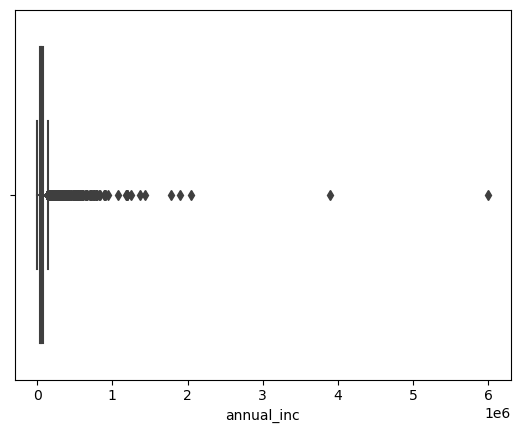

In [38]:
# Handling outliers for annual_inc variable

print(dt.annual_inc.quantile([0.25,0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99]))

sns.boxplot(x=dt['annual_inc'])
plt.show()

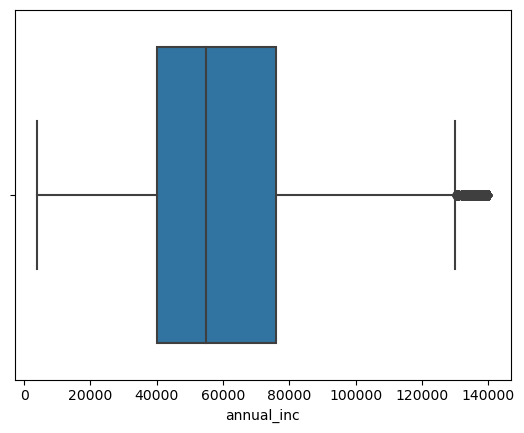

In [39]:
# From the above representation ,There are clearly outliers in annual_inc

# The value after 0.95 quantile seems to be disconnected with the distribution

# Hence ,We will restrict our data set to 0.95 quantile to avoid the irrelevant outlier data  



annual_inc_Q95 = dt['annual_inc'].quantile(0.95)
dt = dt[dt.annual_inc <= annual_inc_Q95]

sns.boxplot(x=dt['annual_inc'])
plt.show()



## Data Analysis

### Visualization of Target State Variable

In [40]:
#Target state visualiazation with the current data

#The current ratio between Fully Paid and Charged off is approx 6:1 

#Currently for every 6 applicant one applicant is a defaulter



dt['loan_status'].value_counts()

Fully Paid     30841
Charged Off     5262
Name: loan_status, dtype: int64

<Axes: xlabel='loan_status', ylabel='count'>

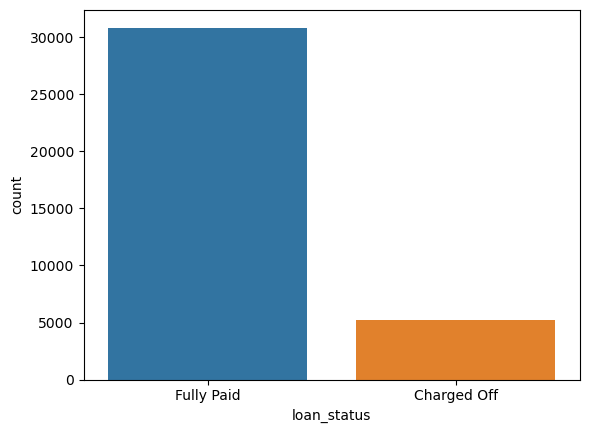

In [41]:
# Now we a clean and more relevant data in our data set for analysis

# We will visualize each variable against the target state "Loan Status -Charged off"

#Current status intrepretation of the loan application from our data set 

sns.countplot(x ='loan_status', data = dt)

### We have the clean , standardized and relevant data in our data set 

###  We will do the EDA on our data to determine the strong factors for loan defaults




## Univariate Analysis :

### Analysis of each available variable against the loan status where status is charged off

<Axes: xlabel='grade', ylabel='count'>

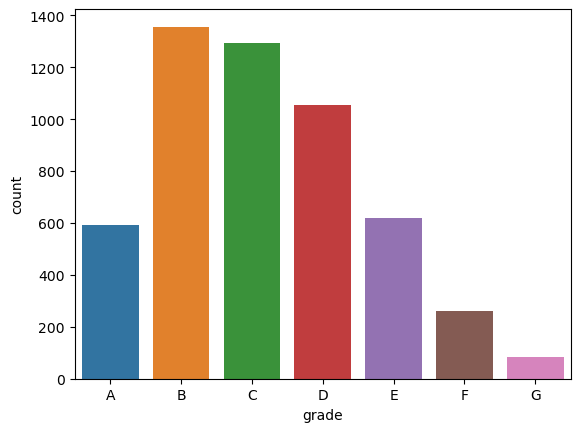

In [42]:
# Analysing Grade (we are limiting oyr analysis at (grade) Grade Level not considering sub-grade)

sns.countplot(x = 'grade', data = dt[dt.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

<Axes: xlabel='issue_year', ylabel='count'>

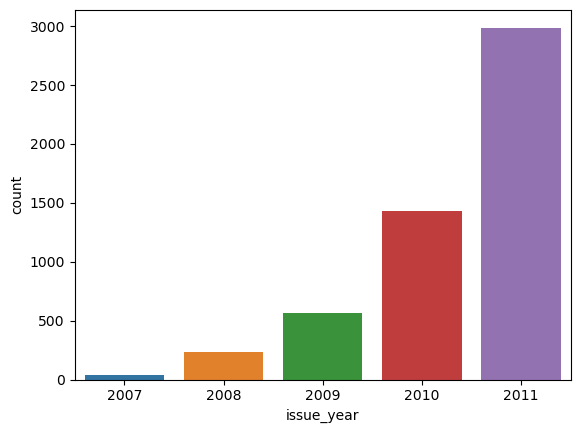

In [43]:
# Analysing the variable issued_year (derived variable from issue_d)

sns.countplot(x='issue_year', data=dt[dt['loan_status']=='Charged Off'])

<Axes: xlabel='issue_month', ylabel='count'>

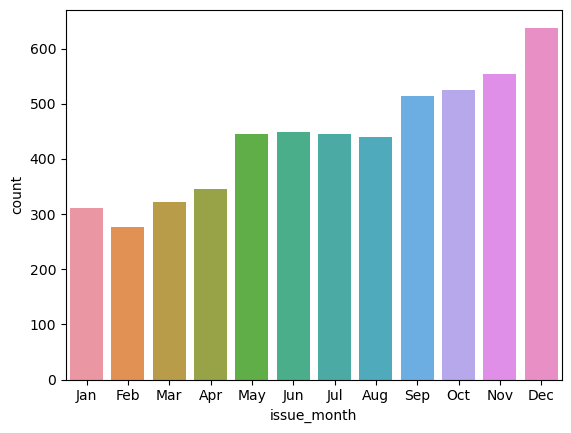

In [44]:
# Analysing the variable issued_month (derived variable from issue_d)

sns.countplot(x='issue_month', data=dt[dt['loan_status']=='Charged Off'],order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])



<Axes: xlabel='term', ylabel='count'>

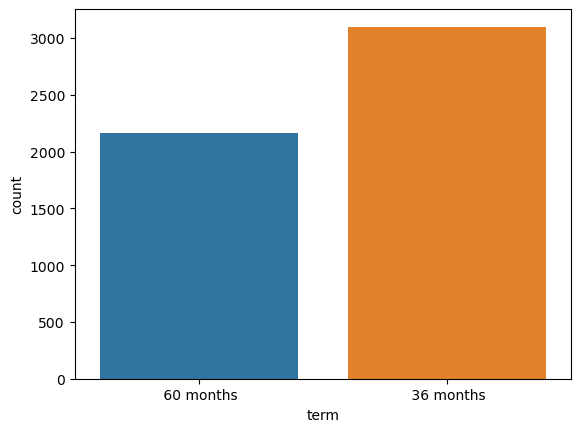

In [45]:
# Analysing the variable term 

sns.countplot(x='term', data=dt[dt['loan_status']=='Charged Off'])

<Axes: xlabel='emp_length', ylabel='count'>

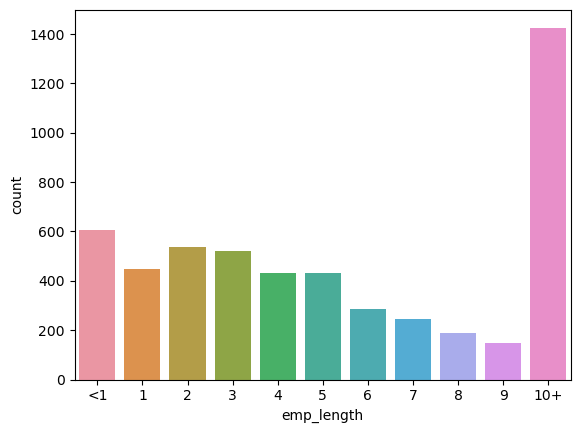

In [46]:
# Analysing the variable emp_length 

sns.countplot(x='emp_length', data=dt[dt['loan_status']=='Charged Off'],order = ['<1','1', '2', '3', '4', '5', '6', '7', '8', '9','10+'])

<Axes: xlabel='home_ownership', ylabel='count'>

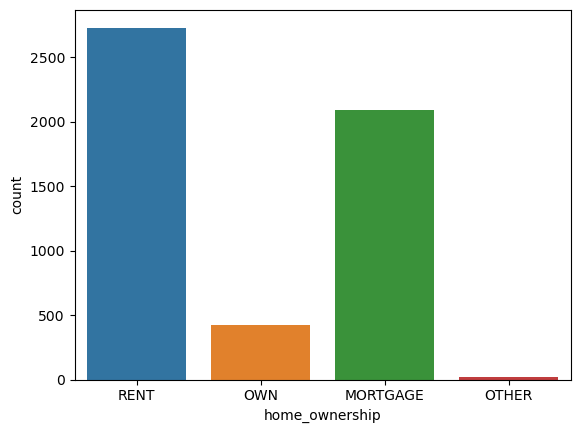

In [47]:
# Analysing the variable home_ownership 
sns.countplot(x='home_ownership', data=dt[dt['loan_status']=='Charged Off'])

<Axes: xlabel='verification_status', ylabel='count'>

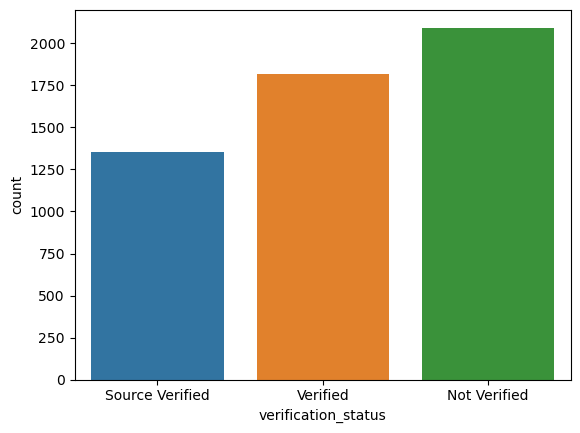

In [48]:
# Analysing the variable verification_status 
sns.countplot(x='verification_status', data=dt[dt['loan_status']=='Charged Off'])

<Axes: xlabel='count', ylabel='purpose'>

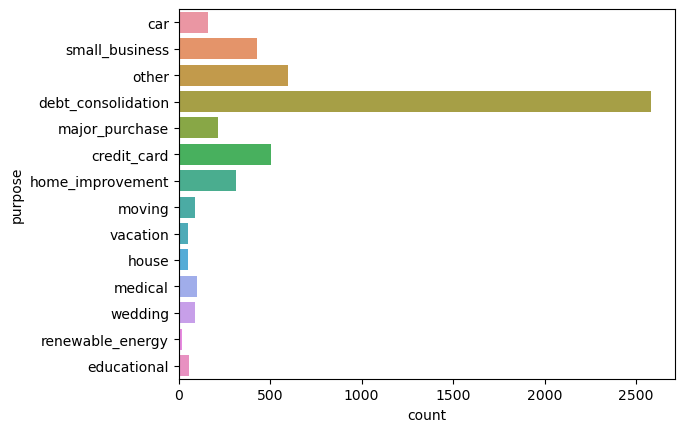

In [49]:
# Analysing the variable purpose 
sns.countplot(y='purpose', data=dt[dt['loan_status']=='Charged Off'])

In [50]:
dt.describe() #TO understand the data range and to determine the bin range for numerical variables

,loan_amnt,int_rate,installment,annual_inc,dti,issue_year
count,36103.000000,36103.000000,36103.000000,36103.000000,36103.000000,36103.000000
mean,10325.965294,11.829221,303.446581,60340.312584,13.431083,2010.298008
std,6466.670796,3.630558,186.908530,27496.954111,6.662636,0.883759
min,500.000000,5.420000,15.690000,4000.000000,0.000000,2007.000000
25%,5000.000000,8.900000,162.210000,40000.000000,8.330000,2010.000000
50%,9000.000000,11.710000,266.400000,55000.000000,13.550000,2011.000000
75%,14400.000000,14.270000,400.990000,76000.000000,18.700000,2011.000000
max,30000.000000,24.400000,1106.070000,140000.000000,29.990000,2011.000000


In [51]:
# creating bins for better understanding of the distribution and visualize the numerical distribution as categorical

# after understanding the data distribution bins are created for the following variables

# installment,loan_amnt,dti,annual_inc,int_rate

dt['installment_category'] = pd.cut(dt['installment'], bins=6,precision =0,labels=['0-185','185-370','370-555','555-740','740-925','925-1110'])
dt['loan_amnt_category'] = pd.cut(dt['loan_amnt'], bins=5,precision =0,labels=['0-6k','6k-12k','12k-18k','18k-24k','24k-30k'])
dt['dti_category'] = pd.cut(dt['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])
dt['int_rate_category'] = pd.cut(dt['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
dt['annual_inc_category'] = pd.cut(dt['annual_inc'], bins=5,precision =0,labels =['0k-28k','28k-56k','56k-84k','84k-112k','112k-140k'])


<Axes: xlabel='loan_amnt_category', ylabel='count'>

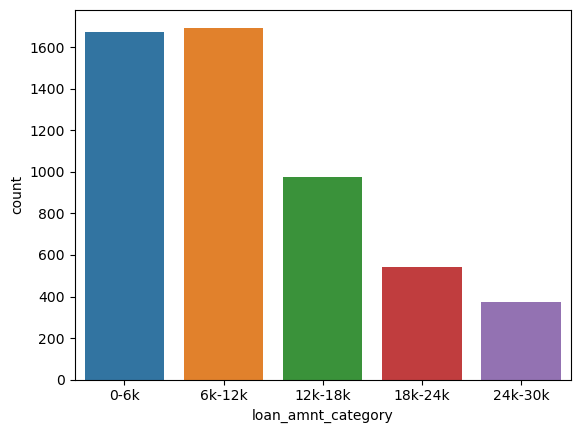

In [52]:
# Analysing the variable loan_amnt 
sns.countplot(x='loan_amnt_category', data=dt[dt['loan_status']=='Charged Off'])

<Axes: xlabel='int_rate_category', ylabel='count'>

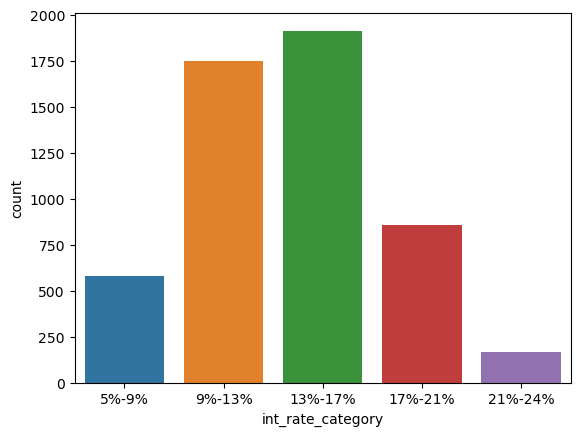

In [53]:
# Analysing the variable int_rate 
sns.countplot(x='int_rate_category', data=dt[dt['loan_status']=='Charged Off'])

<Axes: xlabel='installment_category', ylabel='count'>

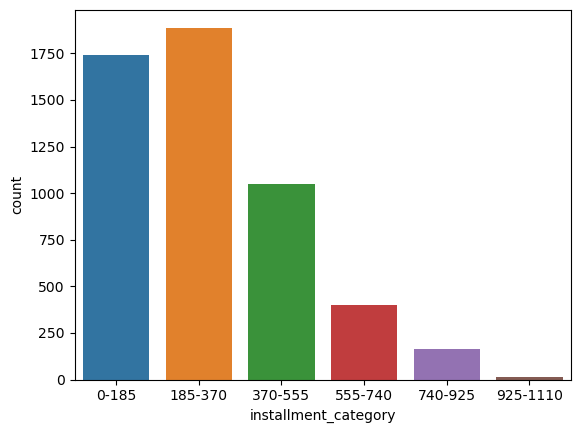

In [54]:
# Analysing the variable installment 

sns.countplot(x='installment_category', data=dt[dt['loan_status']=='Charged Off'])

<Axes: xlabel='dti_category', ylabel='count'>

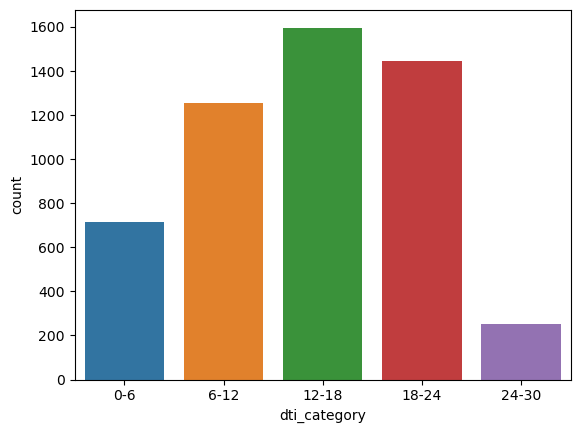

In [55]:
# Analysing the variable dti 

sns.countplot(x='dti_category', data=dt[dt['loan_status']=='Charged Off'])

<Axes: xlabel='annual_inc_category', ylabel='count'>

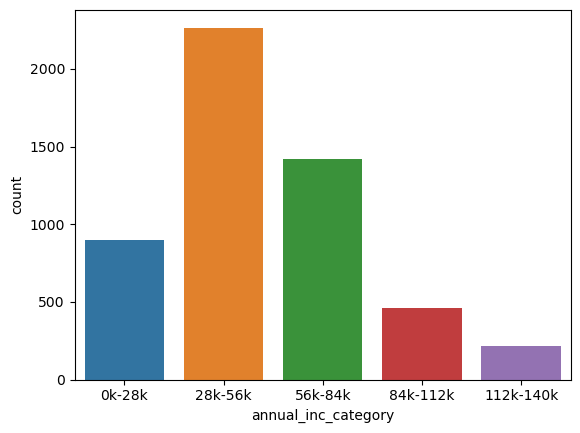

In [56]:
# Analysing the variable annual Income 

sns.countplot(x='annual_inc_category', data=dt[dt['loan_status']=='Charged Off'])

## Understanding the correlation between numerical variables

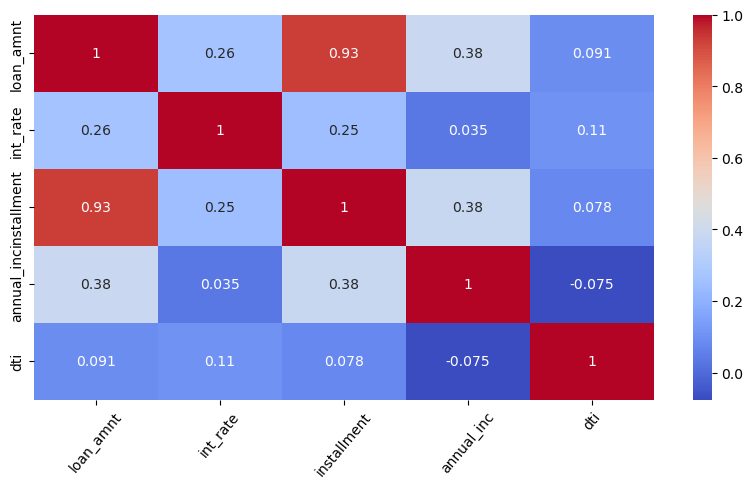

In [57]:
# Correalation between the numeric value

numeric_columns = ['loan_amnt','int_rate','installment','annual_inc','dti']
correlation_matrix = dt[numeric_columns].corr()
f,ax = plt.subplots(figsize= (10,5))

sns.heatmap(correlation_matrix,xticklabels = correlation_matrix.columns.values,yticklabels= correlation_matrix.columns.values,
           cmap= 'coolwarm', annot = True)
plt.xticks(rotation=50)
plt.show()

In [58]:
# we will consider loan_amnt for our analysis as funded_amnt and funded_amnt_inv has similar distribution as loan_amnt 

# Analysing loan_amnt with other columns for more insights



## Bivariate Analysis :

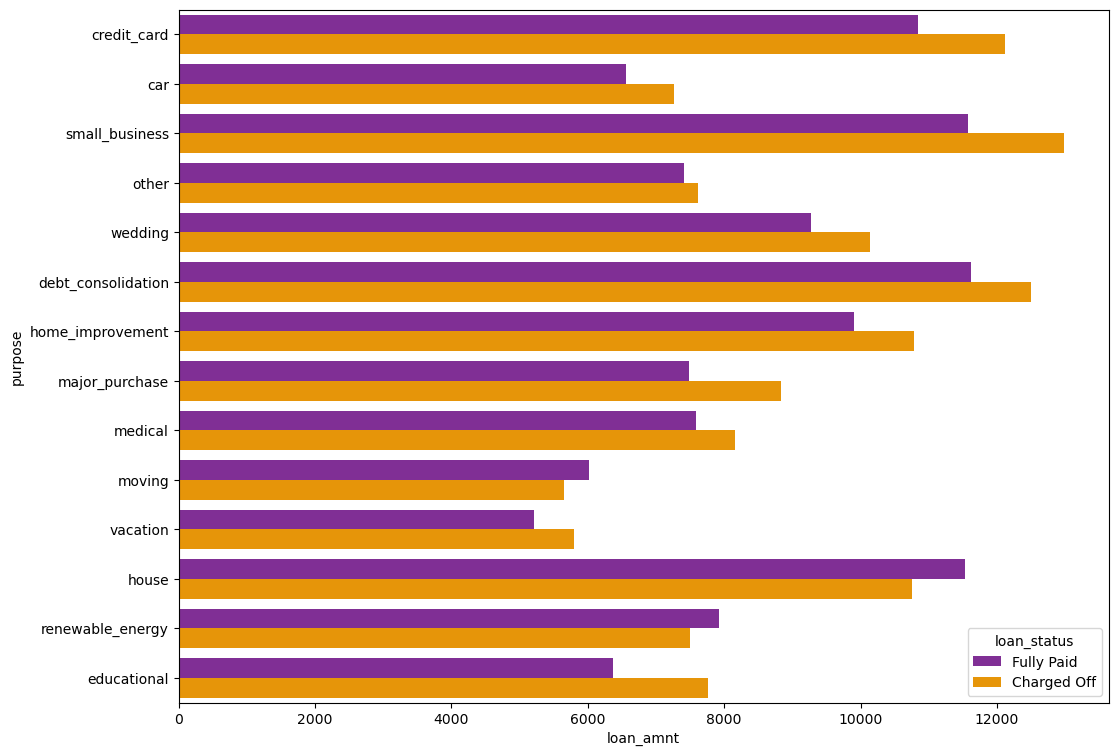

In [59]:
# Bivariate Analysis

# Loan amount vs Pursose over loan_status

plt.figure(figsize=(12,9))
sns.barplot(x='loan_amnt', y='purpose', hue ='loan_status',data=dt,ci=None, palette="CMRmap",saturation=1)
plt.show()

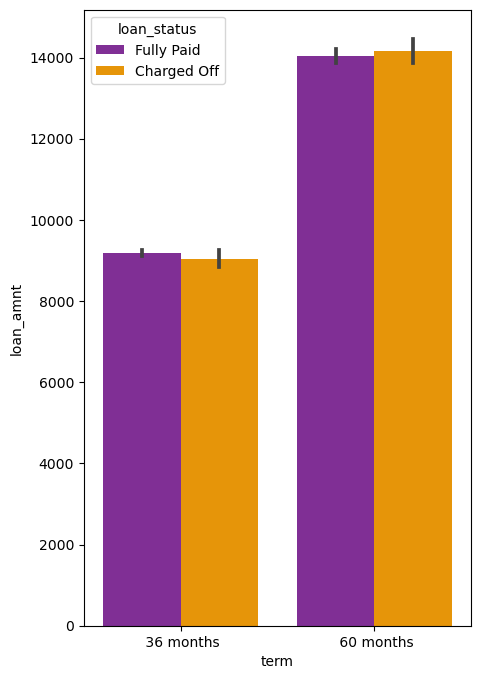

In [60]:
# Loan amount vs term over loan_status

plt.figure(figsize=(5,8))
sns.barplot(y='loan_amnt', x='term', hue ='loan_status',data=dt,palette="CMRmap",saturation=1)
plt.show()

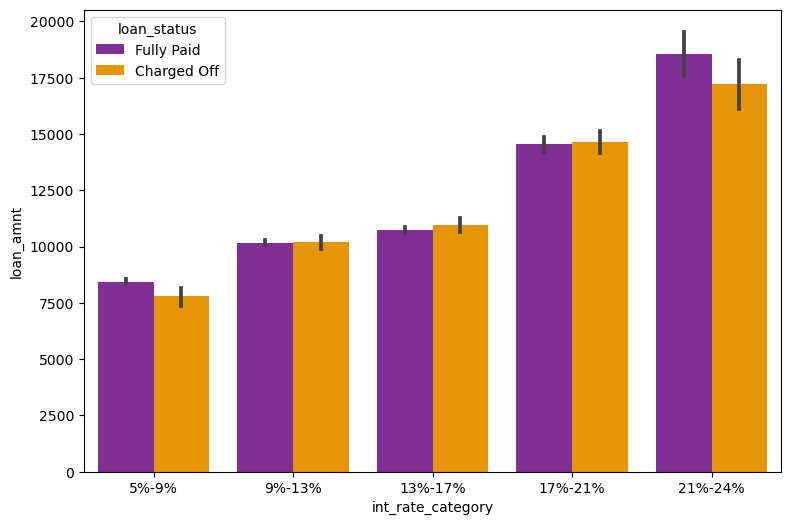

In [61]:
# Loan amount vs interesr rate over loan_status

plt.figure(figsize=(9,6))
sns.barplot(y='loan_amnt', x='int_rate_category', hue ='loan_status',data=dt,palette="CMRmap",saturation=1)
plt.show()

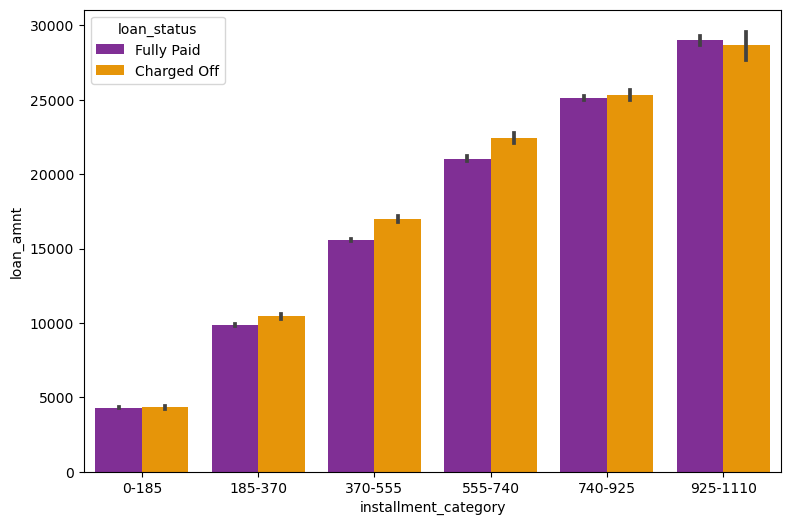

In [62]:
# Loan amount vs installments over loan_status

plt.figure(figsize=(9,6))
sns.barplot(y='loan_amnt', x='installment_category', hue ='loan_status',data=dt,palette="CMRmap",saturation=1)
plt.show()

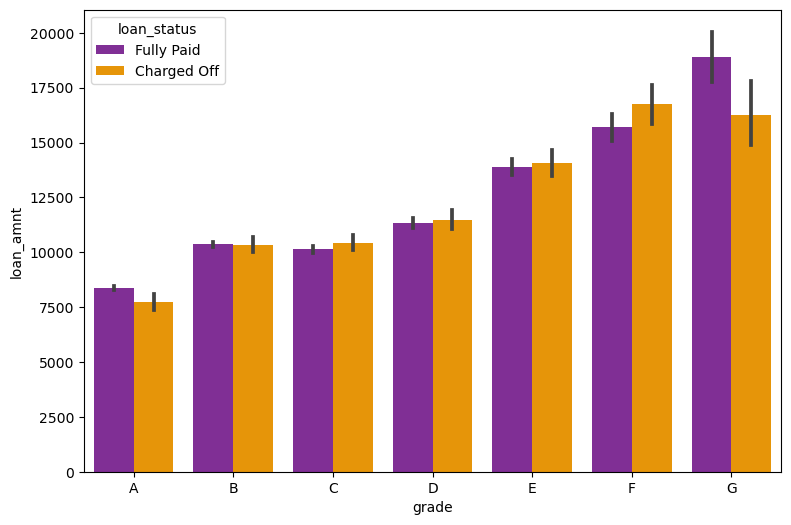

In [63]:
# Loan amount vs Grade over loan_status

plt.figure(figsize=(9,6))
sns.barplot(y='loan_amnt', x='grade', hue ='loan_status',data=dt,palette="CMRmap",order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'],saturation=1)
plt.show()

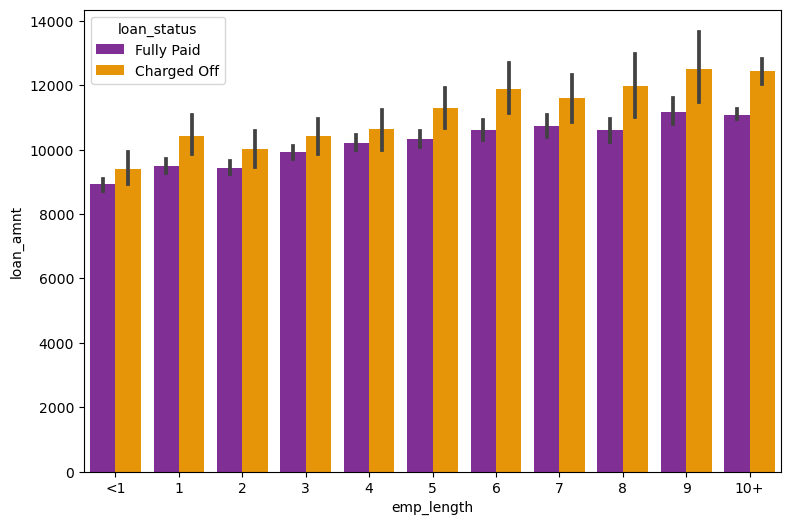

In [64]:
# Loan amount vs Employee Length over loan_status

plt.figure(figsize=(9,6))
sns.barplot(y='loan_amnt', x='emp_length', hue ='loan_status',data =dt,order = ['<1','1', '2', '3', '4', '5', '6', '7', '8', '9','10+'],palette="CMRmap",saturation=1)
plt.show()

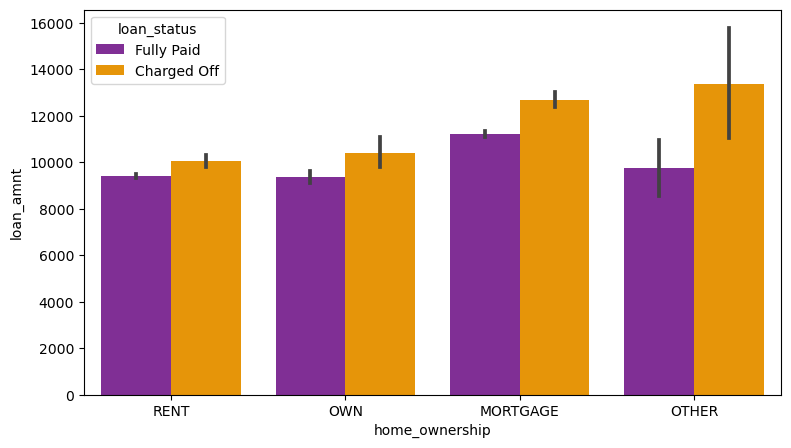

In [65]:
# Loan amount vs Home Ownership  over loan_status


plt.figure(figsize=(9,5))
sns.barplot(y='loan_amnt', x='home_ownership', hue ='loan_status',data =dt,palette="CMRmap",saturation=1)

plt.show()

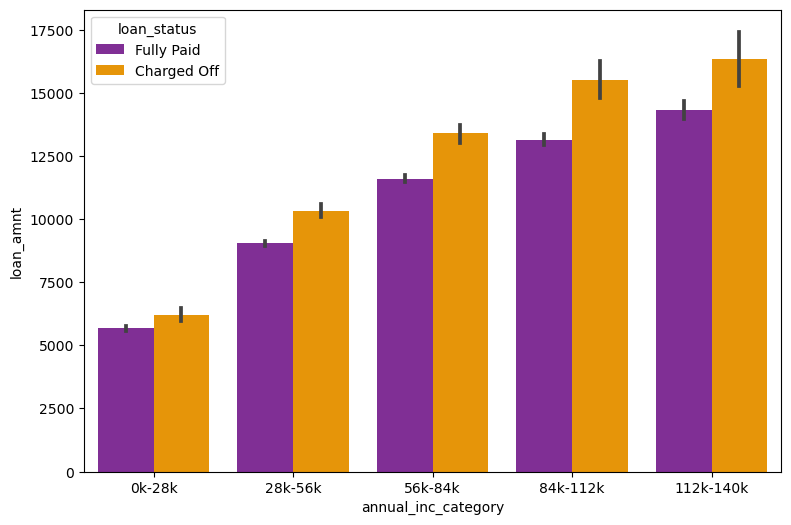

In [66]:
# Loan amount vs annual_income over loan_status

plt.figure(figsize=(9,6))
sns.barplot(y='loan_amnt', x='annual_inc_category', hue ='loan_status',data =dt,palette="CMRmap",saturation=1)

plt.show()

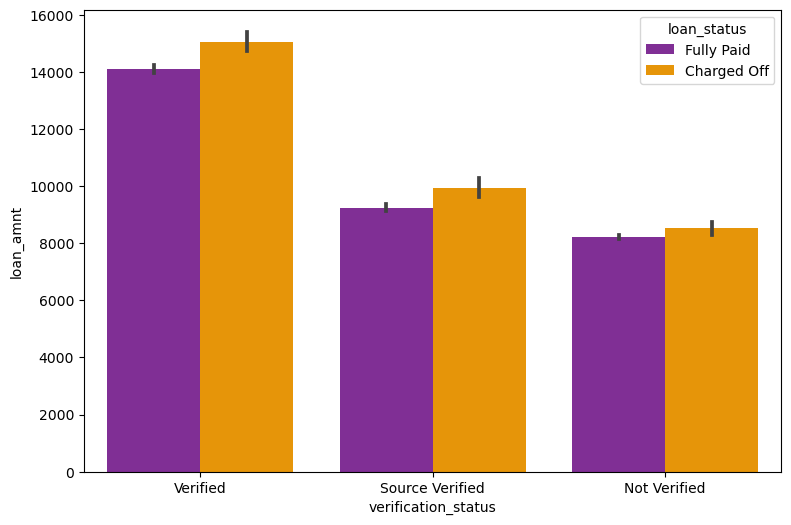

In [67]:
# Loan amount vs Verification Status over loan_status

plt.figure(figsize=(9,6))
sns.barplot(y='loan_amnt', x='verification_status', hue ='loan_status',data =dt,palette="CMRmap",saturation=1)

plt.show()

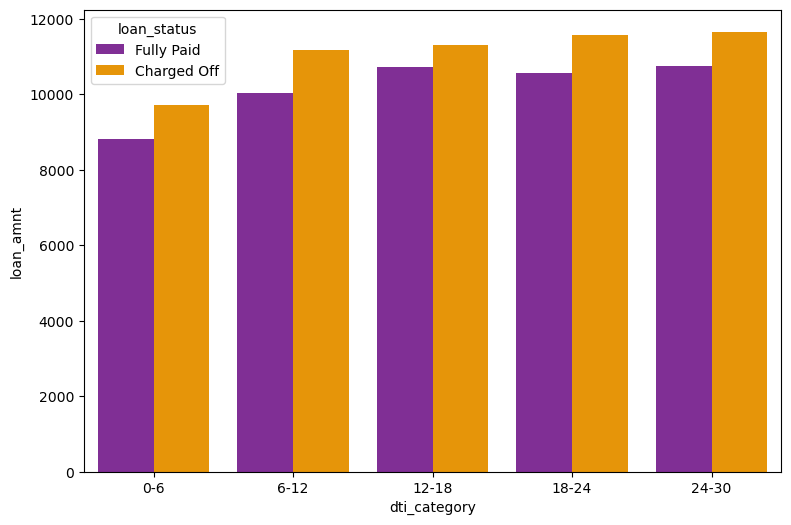

In [68]:
# Loan amount vs Debt to Income  over loan_status

plt.figure(figsize=(9,6))
sns.barplot(y='loan_amnt', x='dti_category', hue ='loan_status',ci=None,data =dt,palette="CMRmap",saturation=1)
plt.show()

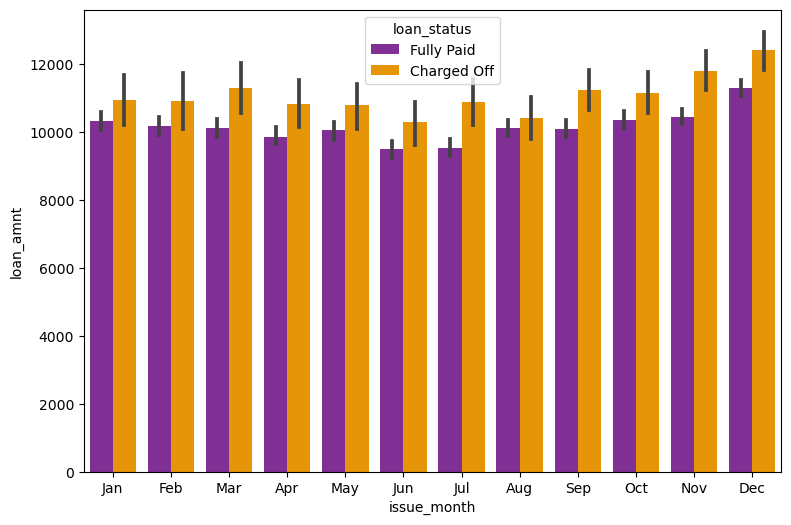

In [69]:
# Loan amount vs issue month over loan_status

plt.figure(figsize=(9,6))
sns.barplot(y='loan_amnt', x='issue_month', hue ='loan_status',data =dt,palette="CMRmap",order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],saturation=1)

plt.show()

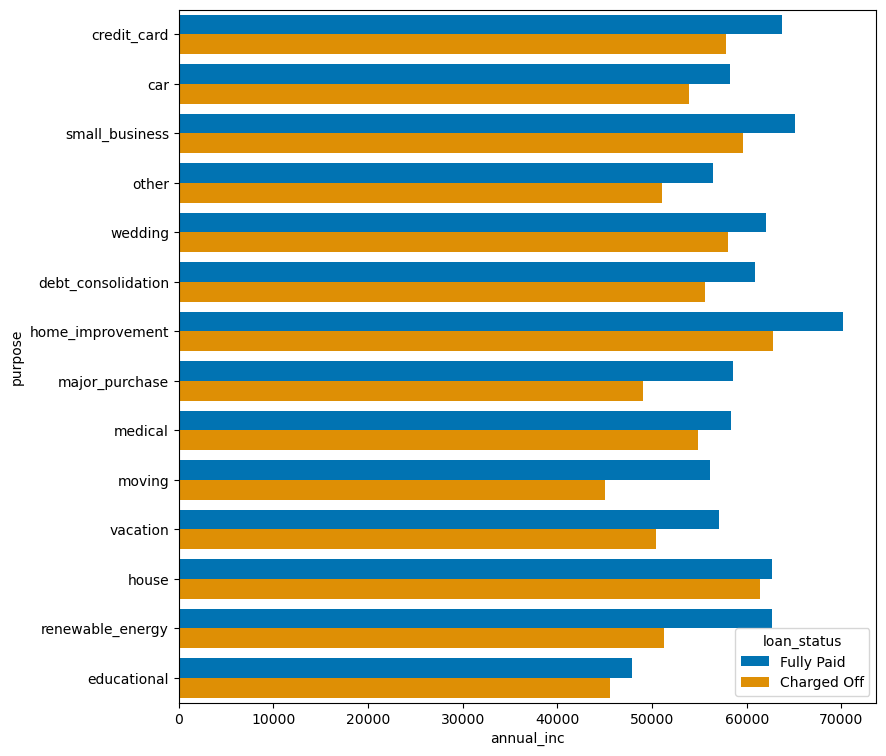

In [70]:
# Analysing annual income with other columns for more insights

# Annual income vs loan purpose

plt.figure(figsize=(9,9))
sns.barplot(x='annual_inc', y='purpose', hue ='loan_status',data =dt,palette="colorblind",ci=None,saturation=1)
plt.show()

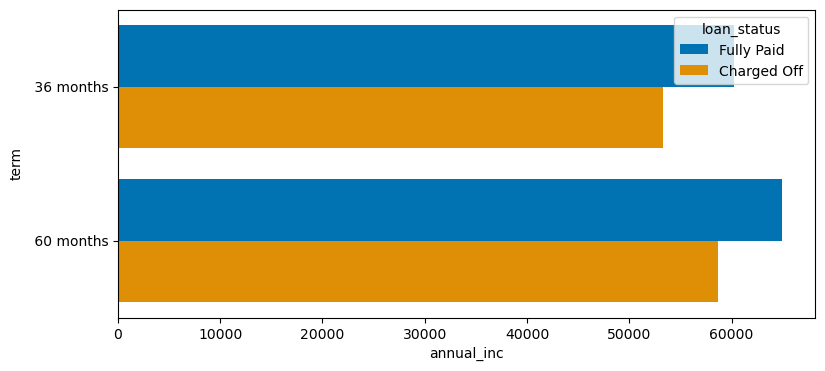

In [71]:
# Annual income vs Term 

plt.figure(figsize=(9,4))
sns.barplot(x='annual_inc', y='term', hue ='loan_status',data =dt,palette="colorblind",ci=None,saturation=1)
plt.show()

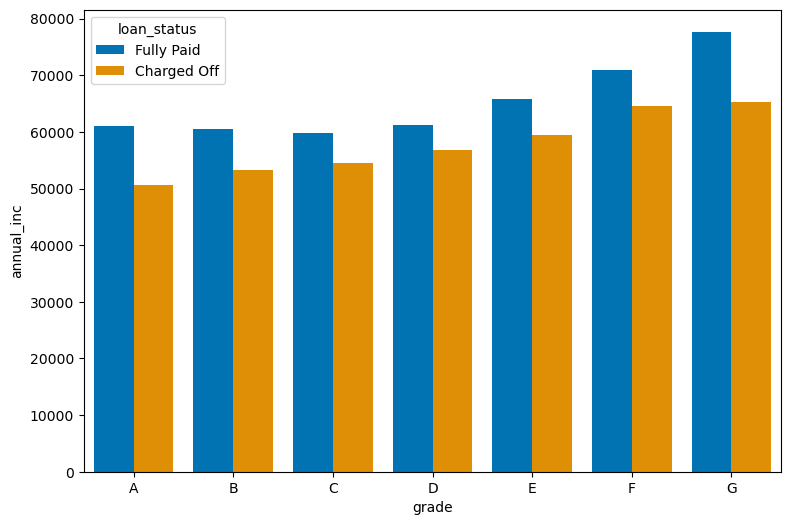

In [72]:
# Annual income vs Grade

plt.figure(figsize=(9,6))
sns.barplot(y='annual_inc', x='grade', hue ='loan_status',data =dt,order = ['A','B', 'C', 'D', 'E', 'F', 'G'],palette="colorblind",ci=None,saturation=1)
plt.show()

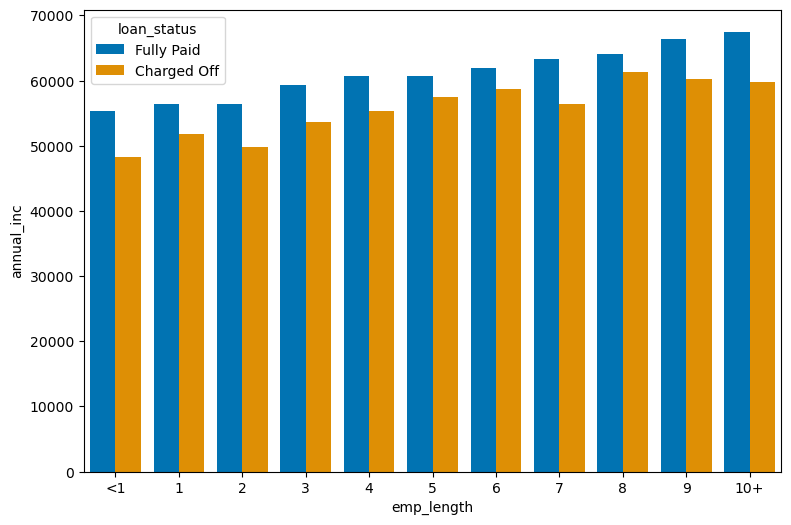

In [73]:
# Annual income vs Employee Length 

plt.figure(figsize=(9,6))
sns.barplot(y='annual_inc', x='emp_length', hue ='loan_status',data =dt,order = ['<1','1', '2', '3', '4', '5', '6', '7', '8', '9','10+'],palette="colorblind",ci=None,saturation=1)
plt.show()

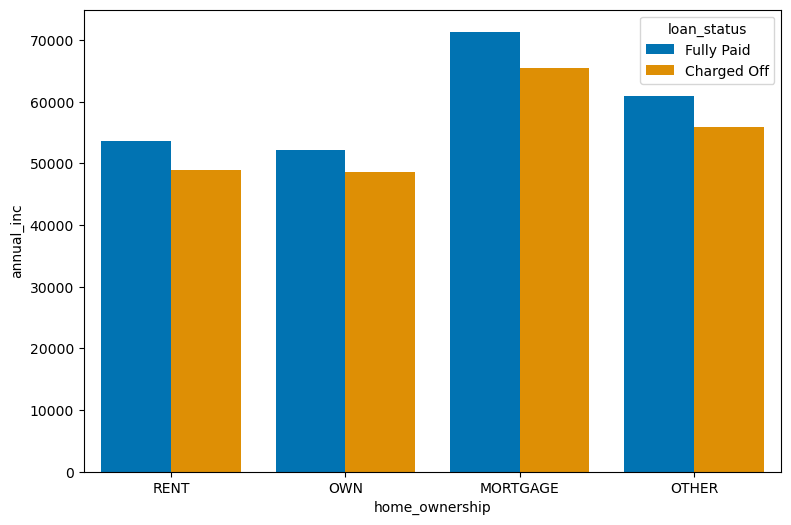

In [74]:
# Annual income vs Home Ownership

plt.figure(figsize=(9,6))
sns.barplot(y='annual_inc', x='home_ownership', hue ='loan_status',data =dt,palette="colorblind",ci=None,saturation=1)
plt.show()

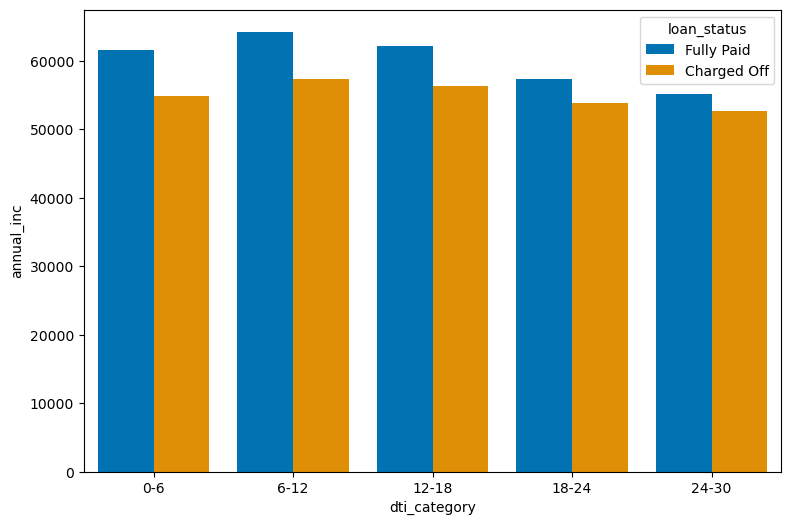

In [75]:
# Annual income vs Debt to Income

plt.figure(figsize=(9,6))
sns.barplot(y='annual_inc', x='dti_category', hue ='loan_status',data =dt,palette="colorblind",ci=None,saturation=1)
plt.show()

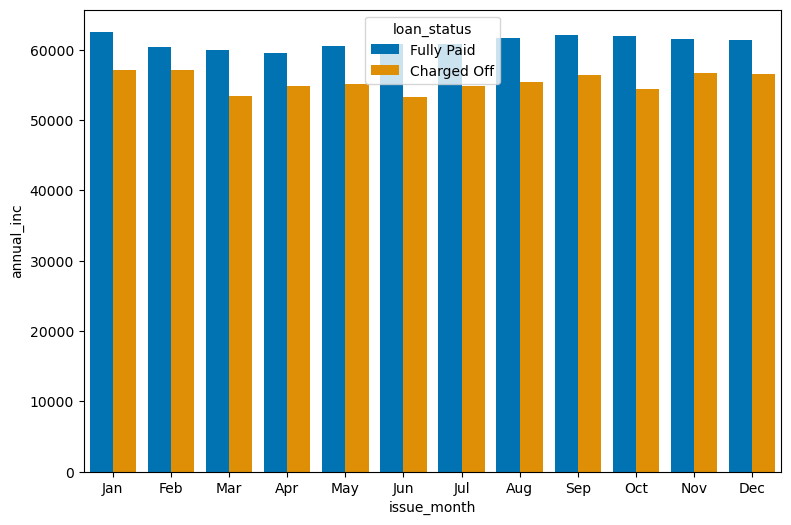

In [76]:
# Annual income vs issue month

plt.figure(figsize=(9,6))
sns.barplot(y='annual_inc', x='issue_month', hue ='loan_status',data =dt,palette="colorblind",ci=None,order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],saturation=1)
plt.show()

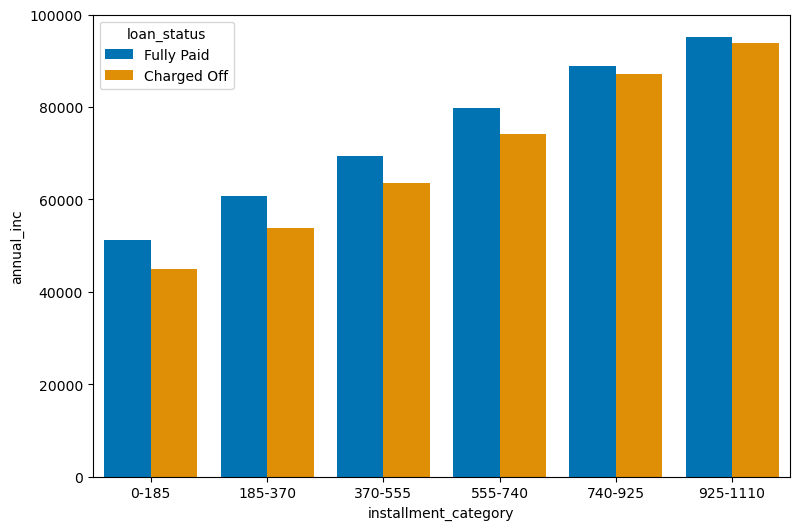

In [77]:
# Annual income vs installment

plt.figure(figsize=(9,6))
sns.barplot(y='annual_inc', x='installment_category', hue ='loan_status',data =dt,palette="colorblind",ci=None,saturation=1)
plt.show()

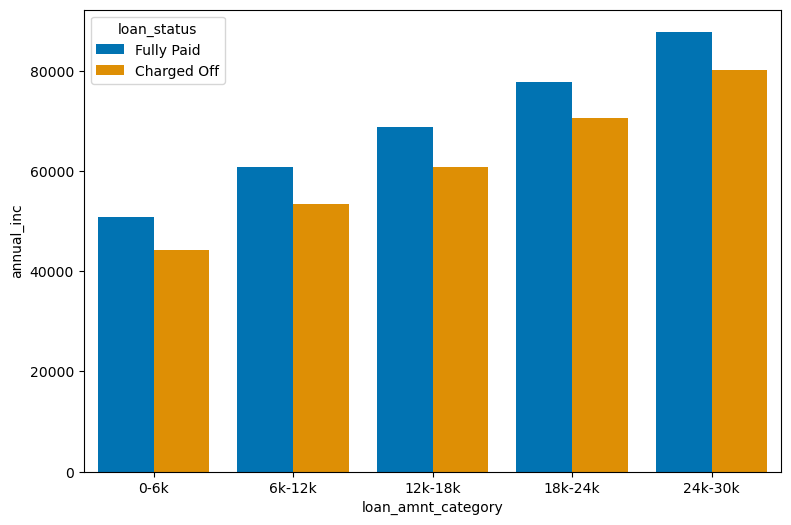

In [78]:
# Annual income vs Loan Amount

plt.figure(figsize=(9,6))
sns.barplot(y='annual_inc', x='loan_amnt_category', hue ='loan_status',data =dt,palette="colorblind",ci=None,saturation=1)
plt.show()

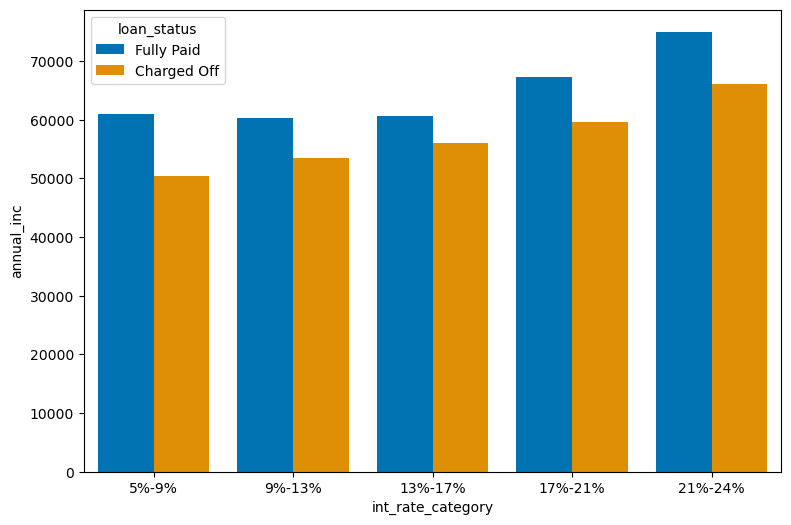

In [79]:
# Annual income vs Iterest Rate

plt.figure(figsize=(9,6))
sns.barplot(y='annual_inc', x='int_rate_category', hue ='loan_status',data =dt,palette="colorblind",ci=None,saturation=1)
plt.show()

In [80]:
# Analysing interst rate with other columns for more insights

# Bivariate Analysis


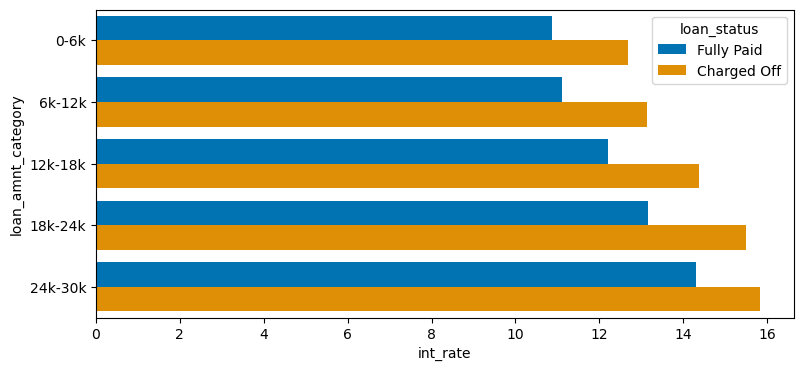

In [81]:
# Interest Rate and loan Amount

plt.figure(figsize=(9,4))
sns.barplot(x='int_rate', y='loan_amnt_category', hue ='loan_status',data =dt,palette="colorblind",ci=None,saturation=1)
plt.show()

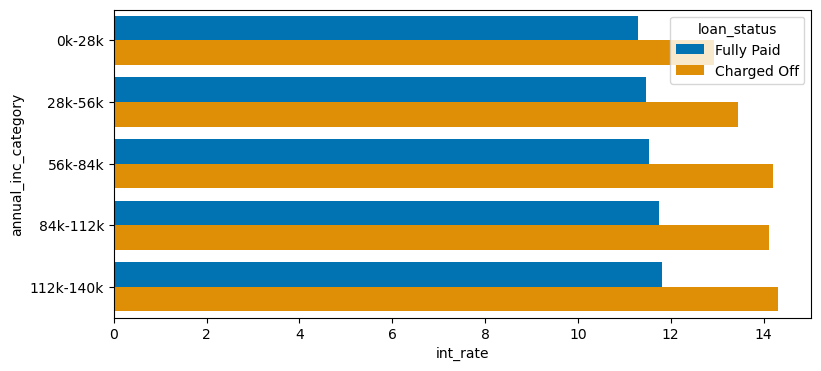

In [82]:
# Interest Rate and  Annual Income

plt.figure(figsize=(9,4))
sns.barplot(x='int_rate', y='annual_inc_category', hue ='loan_status',data =dt,palette="colorblind",ci=None,saturation=1)
plt.show()

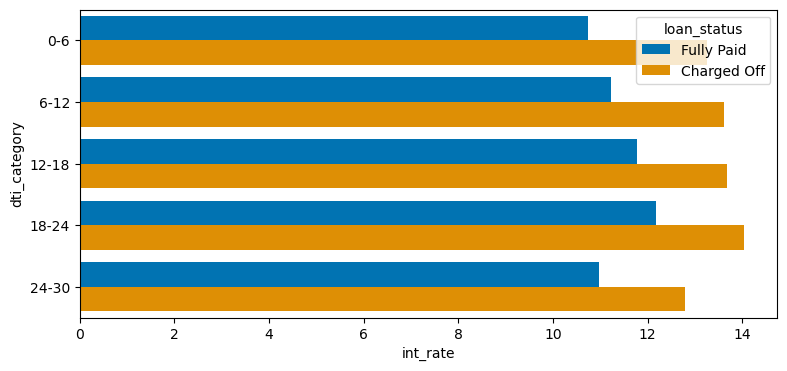

In [83]:
# Interest Rate and Debt To Incoome

plt.figure(figsize=(9,4))
sns.barplot(x='int_rate', y='dti_category', hue ='loan_status',data =dt,palette="colorblind",ci=None,saturation=1)
plt.show()

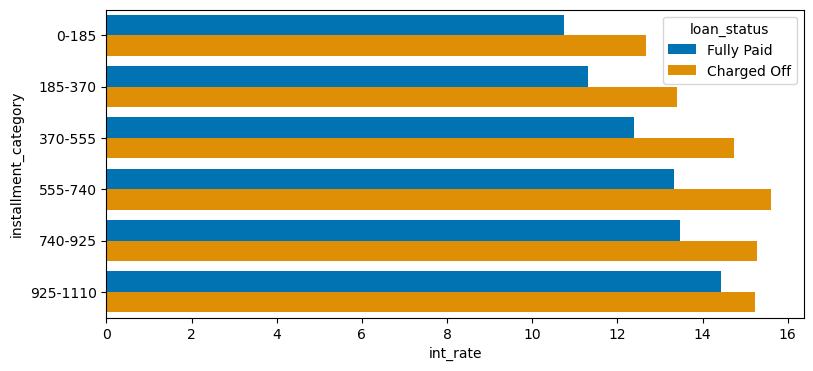

In [84]:
# Interest Rate and Instalment

plt.figure(figsize=(9,4))
sns.barplot(x='int_rate', y='installment_category', hue ='loan_status',data =dt,palette="colorblind",ci=None,saturation=1)
plt.show()

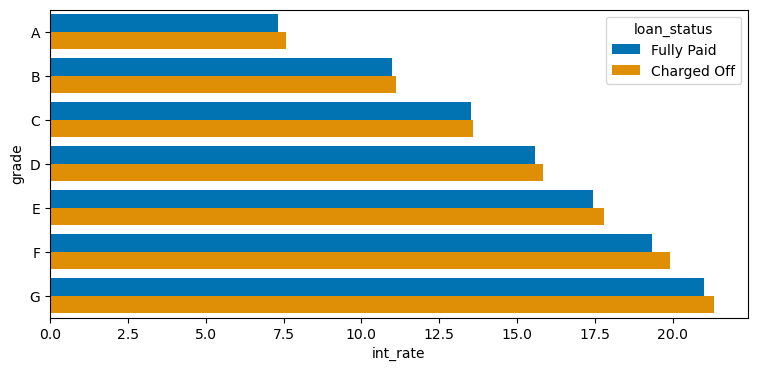

In [85]:
# Interest Rate and Grade

plt.figure(figsize=(9,4))
sns.barplot(x='int_rate', y='grade', order=['A','B','C','D','E','F','G'],hue ='loan_status',data =dt,palette="colorblind",ci=None,saturation=1)
plt.show()

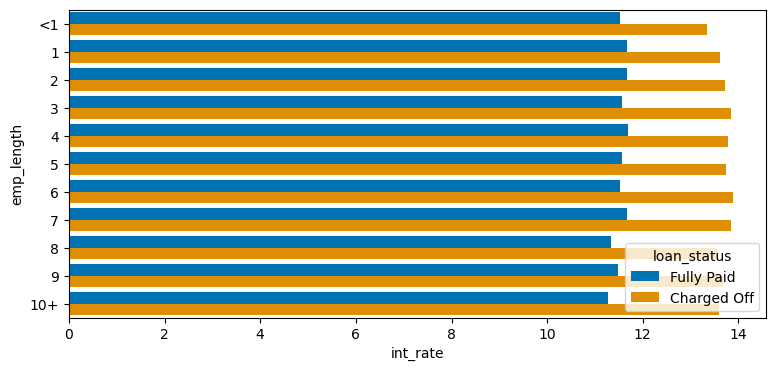

In [86]:
# Interest Rate and Employee Length

plt.figure(figsize=(9,4))
sns.barplot(x='int_rate', y='emp_length',order=['<1','1','2','3','4','5','6','7','8','9','10+'], hue ='loan_status',data =dt,palette="colorblind",ci=None,saturation=1)
plt.show()

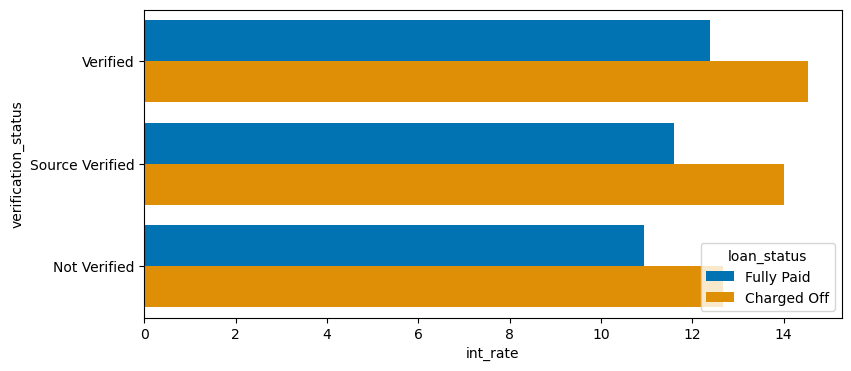

In [87]:
# Interest Rate and Verfication Status

plt.figure(figsize=(9,4))
sns.barplot(x='int_rate', y='verification_status', hue ='loan_status',data =dt,palette="colorblind",ci=None,saturation=1)
plt.show()

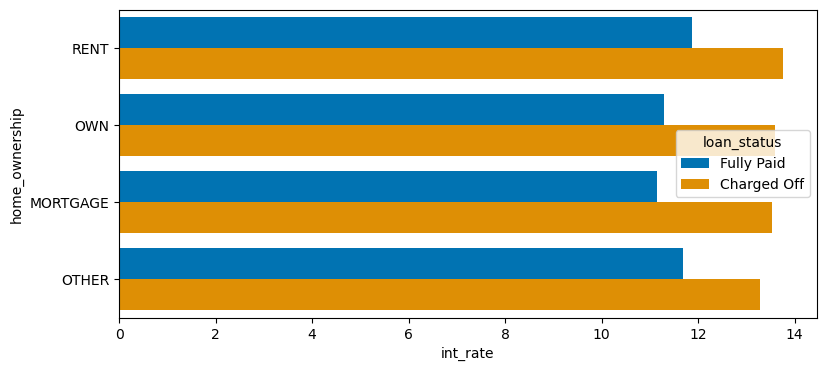

In [88]:
# Interest Rate and Home Ownership

plt.figure(figsize=(9,4))
sns.barplot(x='int_rate', y='home_ownership', hue ='loan_status',data =dt,palette="colorblind",ci=None,saturation=1)
plt.show()

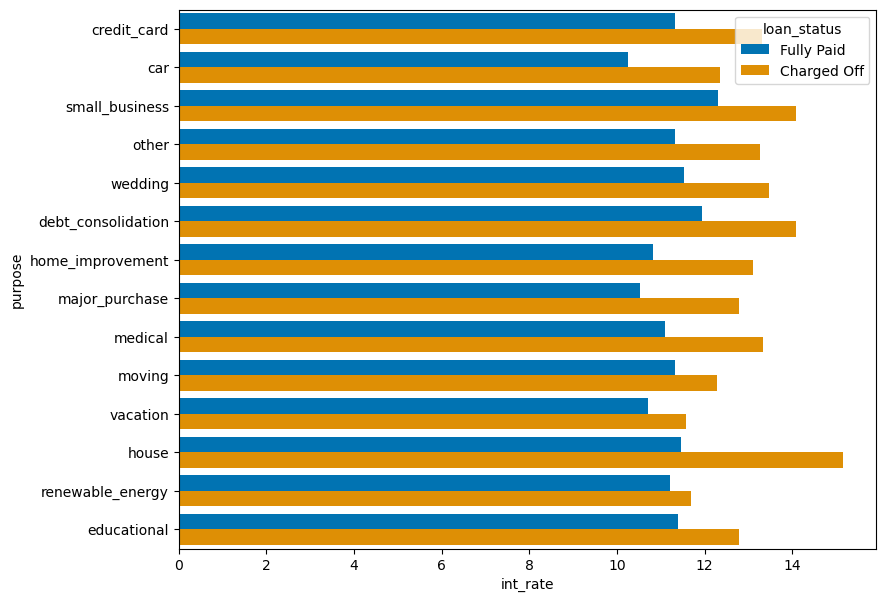

In [89]:
# Interest Rate and Loan Purpose

plt.figure(figsize=(9,7))
sns.barplot(x='int_rate', y='purpose', hue ='loan_status',data =dt,palette="colorblind",ci=None,saturation=1)
plt.show()

## Listed below are the Observation from Univariate Analysis

In [90]:
# 1.	Applicants with grade B are high in charged off status
# 2.	More charged off occurred in the year 2011 
# 3.	More charged off occurred in the month of December
# 4.	Term with 36 months is charged off in high numbers
# 5.	Employment length more than 10 years charged off in high numbers, this could be a fact that all the applicants above 10 years are in the category 10+ years 
# 6.	Applicant who is residing in rented home are charged off in high numbers
# 7.	Applicants whose source are not verified are charged off in high numbers
# 8.	Applicants used loan for debt consolidation are charged off in high numbers
# 9.	Applicants with loan between 500 to 12000 are charged off in high numbers
# 10.	Applicants with interest rate between 13 and 17 are charged off in high numbers
# 11.	Applicants with instalments between 185 and 370 are charged off in high numbers
# 12.	Applicants with debt-to-income ratio between 12 and 18 are charged off in high numbers
# 13.	Applicants with annual income between 28k and 56K are charged off in high numbers


## Listed below are the Observation from Bivariate Analysis

In [91]:
# 1.	If Loan Amount is higher than 10K for the purpose small business, debt consolidation, credit card 
# 2.	If Loan amount more than 12K, and term is 60 months
# 3.	Loan amount higher than15K and interest rate is higher than 20%
# 4.	Loan amount higher than 25K and instalment is higher than 925
# 5.	Loan amount higher than 15K and Grade of the applicants are F and G
# 6.	Applicants whose Home is in Mortgage
# 7.	Loan amount is higher and even if the verification is done
# 8.	Applicant’s Annual income is higher than 60k with purpose of loan is for high home improvement, small business
# 9.	Applicant’s Annual income is higher than 60k and falls in lower Grade as F and G 
# 10.	Interest Rate is higher than 14% and purpose of loan is small business



### End of Analysis

### Contributors: 

   ### 1.Antony John Sundar Aruldos
   ### 2.Subhrabindu Khuntia